In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('hourly_wages_data.csv')
train_df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


Розіб'ємо наш датасет на невчальну валідаціну та тестову вибірки у співвідношенні 70:20:10 відповідно.

In [ ]:
import numpy as np

train, val, test = np.split(train_df.sample(frac=1, random_state=1), [int(0.7*len(train_df)), int(0.9*len(train_df))]) 

Переконаємося, що вибірки містять випадкові записи

In [ ]:
train.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
529,11.36,0,18,5,29,0,0,0,0,0
403,5.55,1,11,45,62,1,0,0,0,0
464,6.25,0,16,7,29,1,1,0,0,0
142,14.21,1,11,15,32,0,0,0,1,0
521,22.50,0,16,17,39,0,1,0,1,0


In [ ]:
val.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
118,6.88,0,8,22,36,1,1,0,0,0
417,13.00,1,12,25,43,0,1,0,0,0
170,44.50,0,14,1,21,1,0,0,0,0
475,5.50,0,16,29,51,0,1,1,0,0
54,4.00,0,13,0,19,0,0,0,0,0


In [ ]:
test.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
336,4.25,0,12,20,38,1,1,0,0,0
308,5.00,0,13,6,25,1,1,1,0,0
26,9.36,0,12,8,26,0,1,0,1,0
76,4.00,1,11,25,42,1,1,1,1,0
43,4.85,0,9,16,31,1,1,0,1,0


In [ ]:
print(train.shape[0])
print(val.shape[0])
print(test.shape[0])

373
107
54


In [ ]:
train_y, train_X = train['age'], train.drop(columns=['age'])
val_y, val_X = val['age'], val.drop(columns=['age'])
test_y, test_X = test['age'], test.drop(columns=['age'])

Побудуємо модель

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
models = []
neurons = 16

for i in range(4):
  models.append(Sequential([
                      Dense(neurons, activation='relu', input_shape=(train_X.shape[1],)),
                      Dense(neurons, activation='relu'),
                      Dense(neurons, activation='relu'),
                      Dense(1)
  ]))

  models[i].compile(optimizer='adam', loss='mean_squared_error')
  neurons *= 2

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
validation_data = (val_X, val_y)
EPOCHS = 50
histories = []

for i in range(4):
    histories.append(models[i].fit(train_X, train_y, validation_data=validation_data,
                      epochs=EPOCHS))

Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 1254.5057 - val_loss: 1181.9210
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 1068.5629 - val_loss: 963.3132
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 839.5683 - val_loss: 716.5440
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 587.1773 - val_loss: 447.6468
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 337.1201 - val_loss: 204.8632
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 144.9292 - val_loss: 76.0755
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 62.7756 - val_loss: 46.8343
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 45.5278 - val_loss: 37.8600
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 31.3351 - val_loss: 25.4186
Epoch 10/50
12/12 [==============================] - 0s 4ms/step - loss: 19.6311 - va

Побудуємо графіки точності

In [ ]:
import matplotlib.pyplot as plt

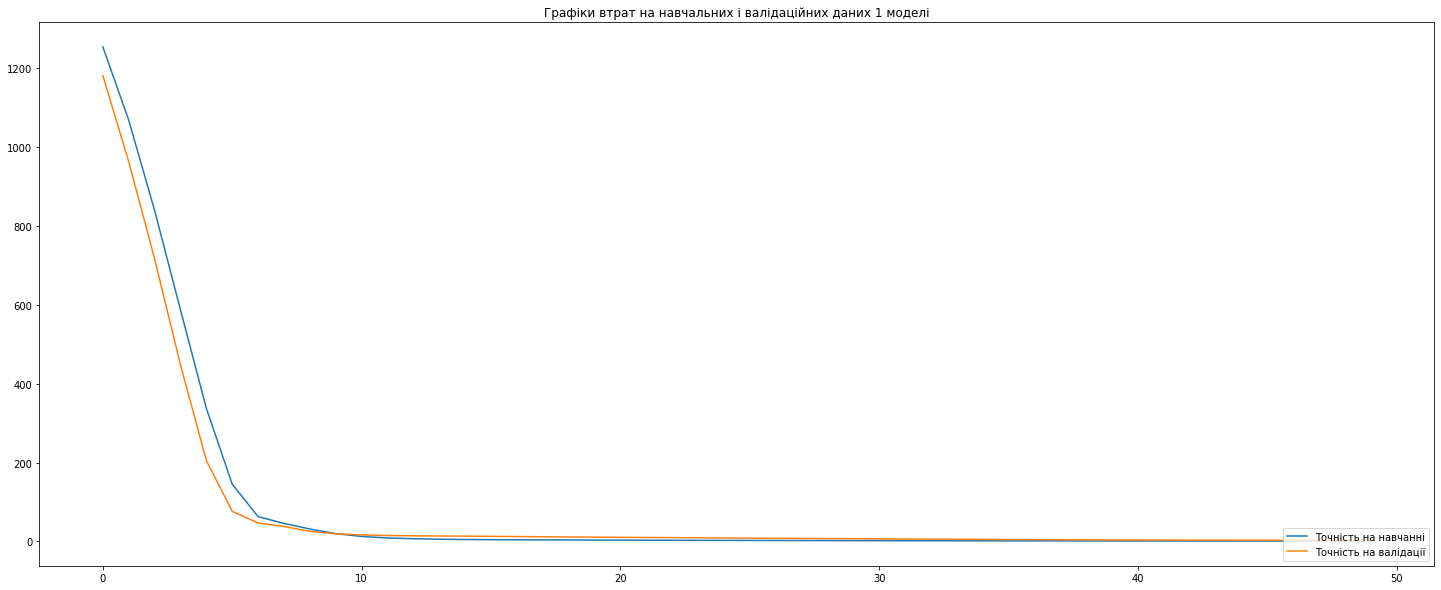

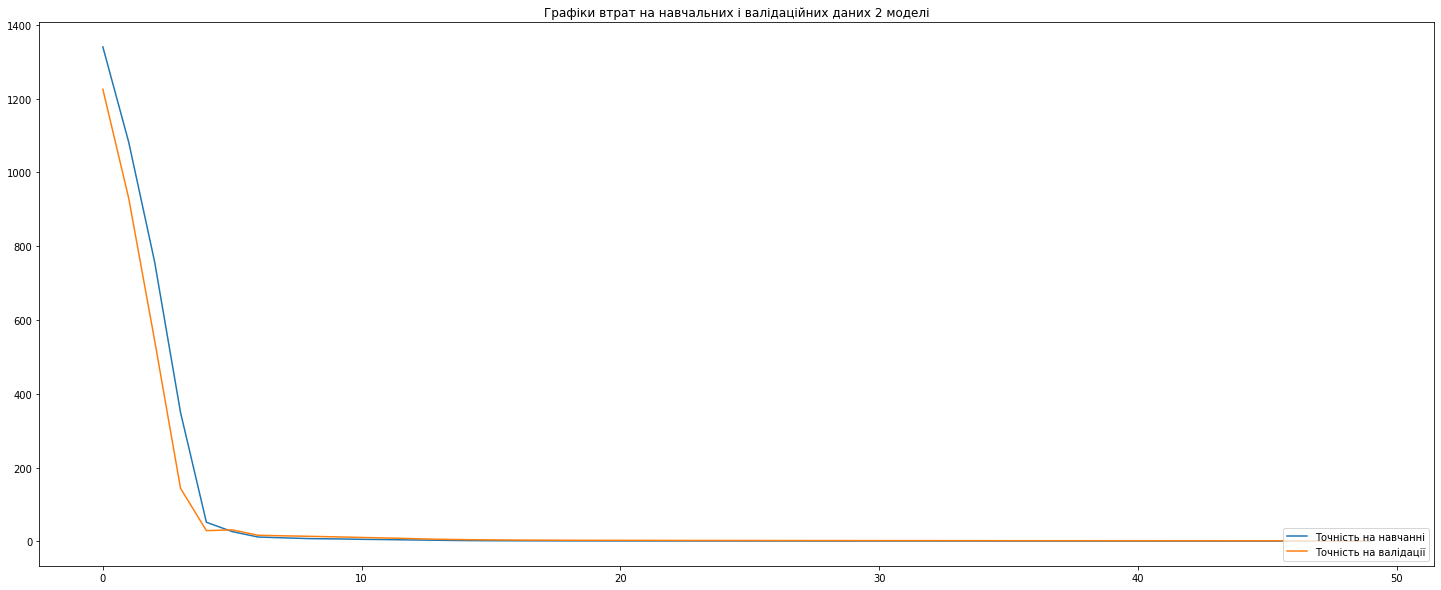

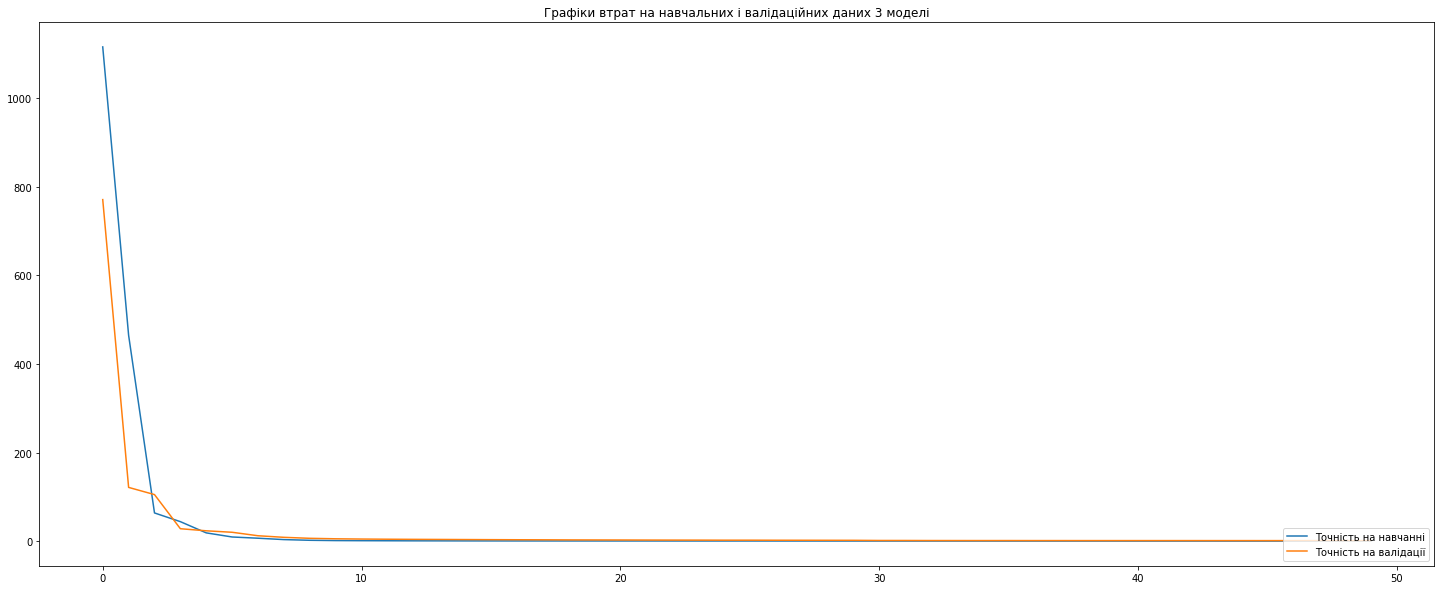

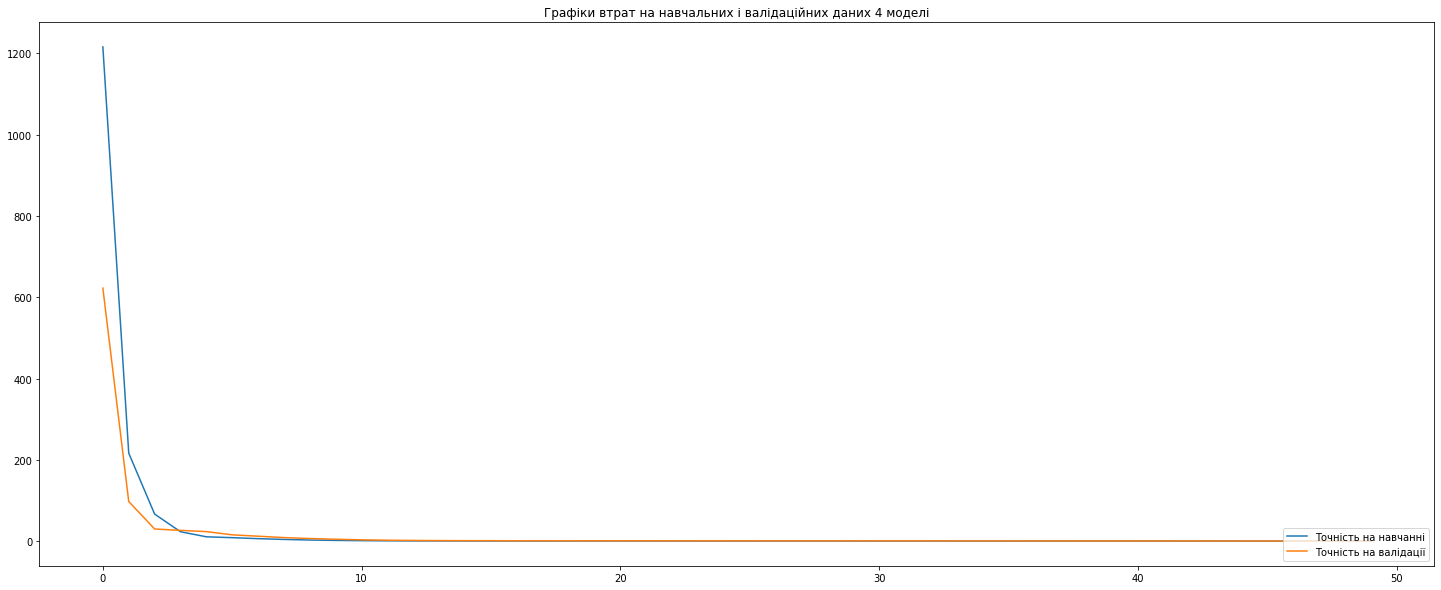

In [ ]:
counter = 0
for i in histories:
  counter += 1
  loss = i.history['loss']
  val_loss = i.history['val_loss']
  
  epochs_range = range(EPOCHS)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Точність на навчанні')
  plt.plot(epochs_range, val_loss, label='Точність на валідації')
  plt.legend(loc='lower right')
  plt.title(f'Графіки втрат на навчальних і валідаційних даних {counter} моделі')

In [ ]:
predictions = (models[2].predict(test_X))
test_y = pd.DataFrame(test_y)
counter = 0
for i in test_y['age']:
  print(f"Точне значення: {i}, передбачуване значення: {predictions[counter][0]}")
  counter += 1

# for i in range(0,len(test_y)):
# 	print("Точне значення: {0}, передбачуване значення: {1}".format(test_y[i], predictions[i][0]))

Точне значення: 38, передбачуване значення: 37.63715362548828
Точне значення: 25, передбачуване значення: 25.154239654541016
Точне значення: 26, передбачуване значення: 25.353206634521484
Точне значення: 42, передбачуване значення: 42.25060272216797
Точне значення: 31, передбачуване значення: 30.06814193725586
Точне значення: 26, передбачуване значення: 25.654207229614258
Точне значення: 47, передбачуване значення: 47.95463562011719
Точне значення: 22, передбачуване значення: 21.011093139648438
Точне значення: 31, передбачуване значення: 30.969219207763672
Точне значення: 27, передбачуване значення: 26.72366714477539
Точне значення: 61, передбачуване значення: 60.648536682128906
Точне значення: 36, передбачуване значення: 37.32643508911133
Точне значення: 44, передбачуване значення: 43.813480377197266
Точне значення: 40, передбачуване значення: 39.667388916015625
Точне значення: 33, передбачуване значення: 32.86533737182617
Точне значення: 34, передбачуване значення: 34.0113525390625
Т

In [ ]:
for i in range(4):
  print(f'Model {i+1} loss: {models[i].evaluate(test_X, test_y)}')



2/2 [==============================] - 0s 6ms/step - loss: 0.6130
Model 1 loss: 0.612960696220398
2/2 [==============================] - 0s 7ms/step - loss: 0.5787
Model 2 loss: 0.5786933302879333
2/2 [==============================] - 0s 6ms/step - loss: 0.3649
Model 3 loss: 0.3648712635040283
2/2 [==============================] - 0s 13ms/step - loss: 0.4275
Model 4 loss: 0.42753225564956665


Для подальших дій та аналізів оберемо 4 модель, оскільки вона наййраще навчена

Спробуємо дослідити, як впливає скейлінг даних на результат нашої моделі

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_X)
histories.append(models[3].fit(train_X, train_y, validation_data=validation_data,
                      epochs=EPOCHS))



Epoch 1/50
12/12 [==============================] - 0s 11ms/step - loss: 0.4441 - val_loss: 0.6225
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4249 - val_loss: 0.6174
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4232 - val_loss: 0.5983
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.4361 - val_loss: 0.6057
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4099 - val_loss: 0.6148
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3954 - val_loss: 0.5680
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.3992 - val_loss: 0.5932
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 0.3837 - val_loss: 0.5814
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3833 - val_loss: 0.5783
Epoch 10/50
12/12 [==============================] - 0s 4ms/step - loss: 0.3729 - val_loss: 0.5452
Epoch 11/50
12/12 

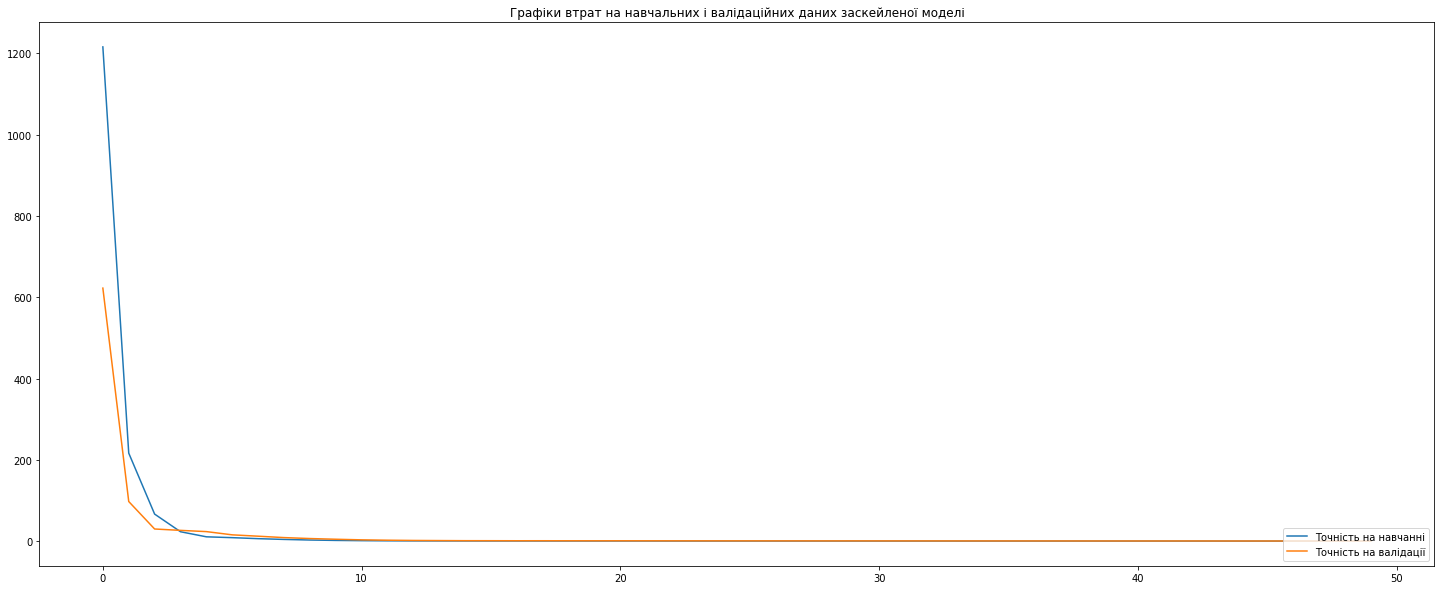

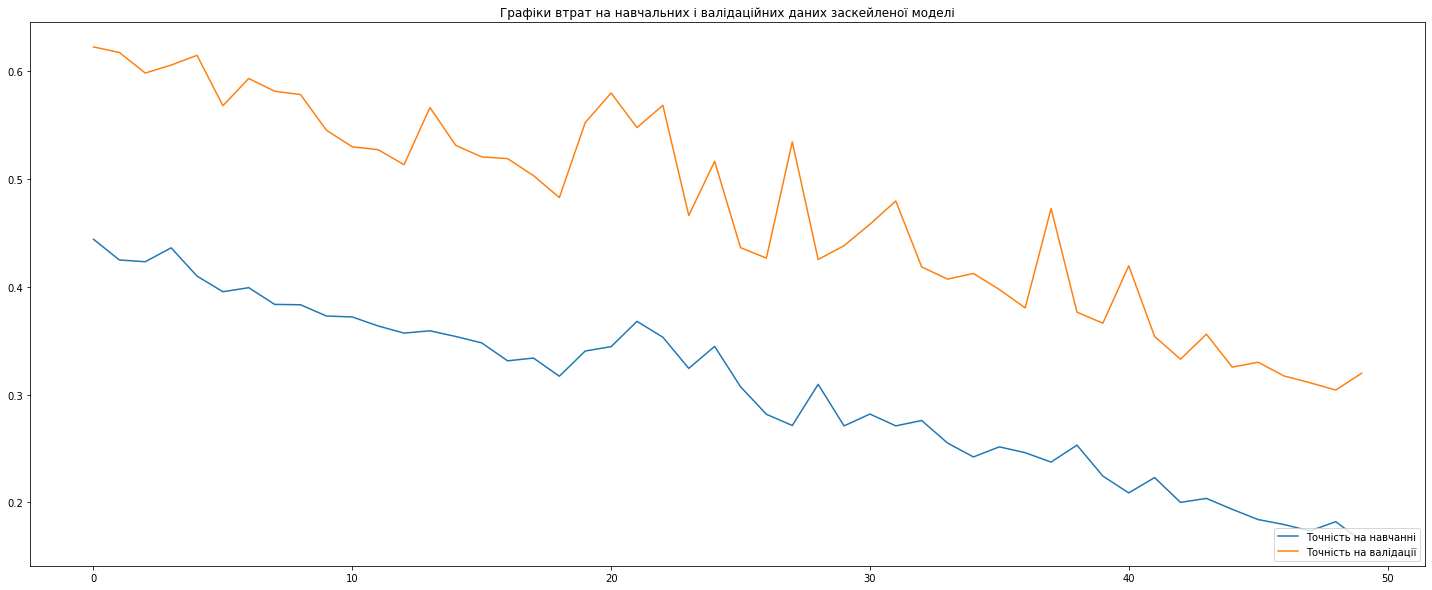

In [ ]:
counter = 0

for i in range(3,5):
  counter += 1
  loss = histories[i].history['loss']
  val_loss = histories[i].history['val_loss']
  
  epochs_range = range(EPOCHS)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Точність на навчанні')
  plt.plot(epochs_range, val_loss, label='Точність на валідації')
  plt.legend(loc='lower right')
  if counter == 0:
    plt.title(f'Графіки втрат на навчальних і валідаційних даних звичайної моделі')
  else:
    plt.title(f'Графіки втрат на навчальних і валідаційних даних заскейленої моделі') 

З графіків вище можемо зробити висновок, що скейлинг даних приводить до менших втрат, а відповідно і кращої роботи моделі.

Тепер порівняємо роботу різних оптимізаторів навчання

In [ ]:
neurons = 128
optimizer = ['adam', 'rmsprop', 'nadam', 'adamax']

for i in range(4):
  models[i] = Sequential([
                      Dense(neurons, activation='relu', input_shape=(train_X.shape[1],)),
                      Dense(neurons, activation='relu'),
                      Dense(neurons, activation='relu'),
                      Dense(1)
  ])

  models[i].compile(optimizer=optimizer[i], loss='mean_squared_error')

In [ ]:
for i in range(4):
    histories[i] = models[i].fit(train_X, train_y, validation_data=validation_data,
                      epochs=EPOCHS)

Epoch 1/50
12/12 [==============================] - 1s 19ms/step - loss: 602.2197 - val_loss: 55.4918
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 75.6395 - val_loss: 47.5771
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 22.2851 - val_loss: 34.1248
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 13.9388 - val_loss: 20.3052
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 7.0107 - val_loss: 10.0812
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 3.4444 - val_loss: 6.4537
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 1.9079 - val_loss: 3.9579
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 1.2856 - val_loss: 2.7701
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 1.0189 - val_loss: 2.3626
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 0.9196 - val_loss: 2.1877
Epoch 11

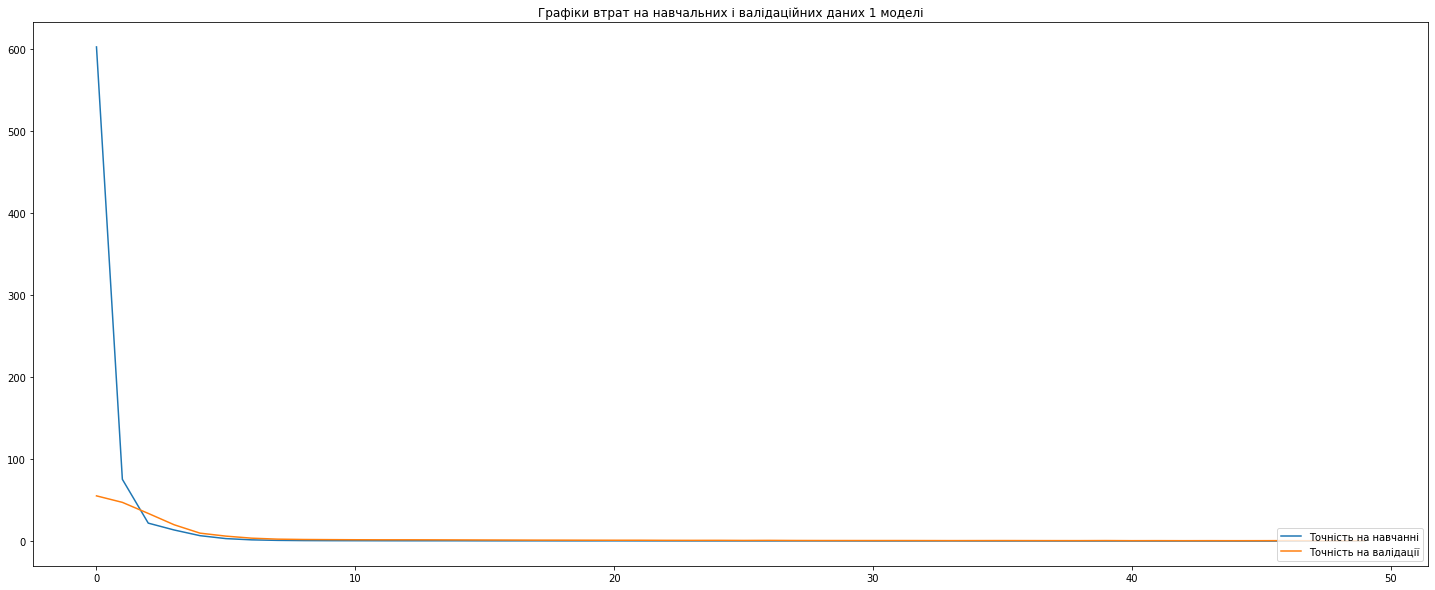

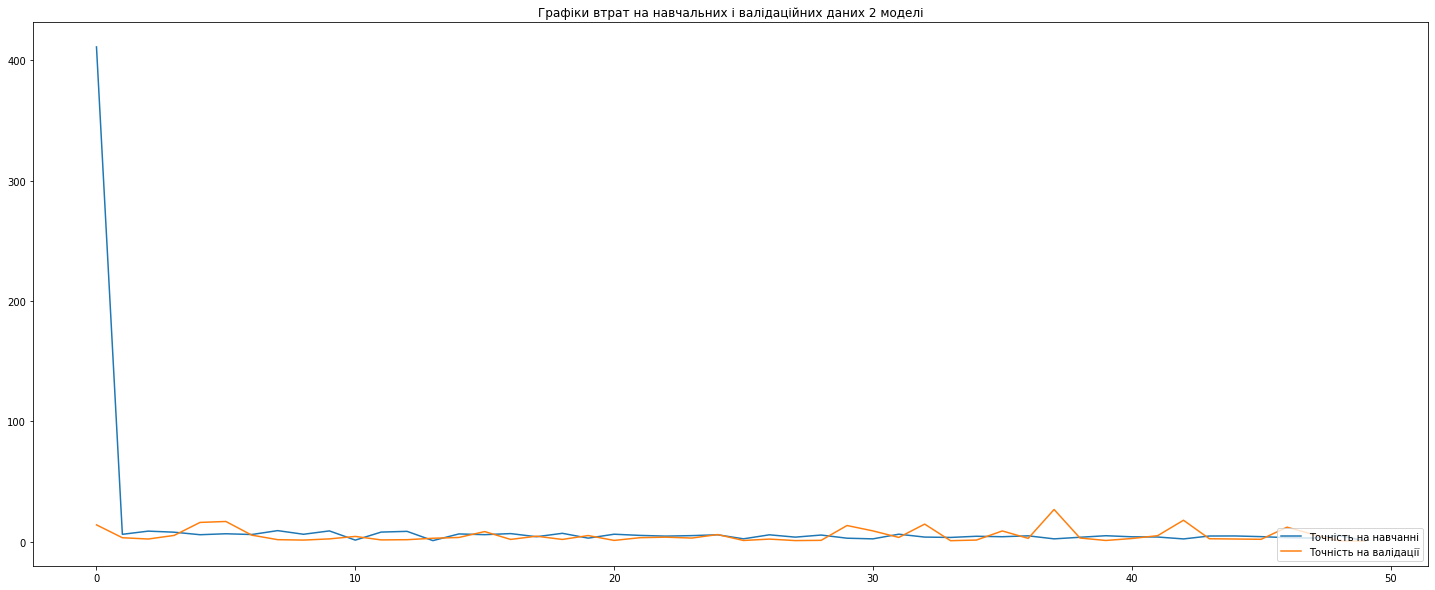

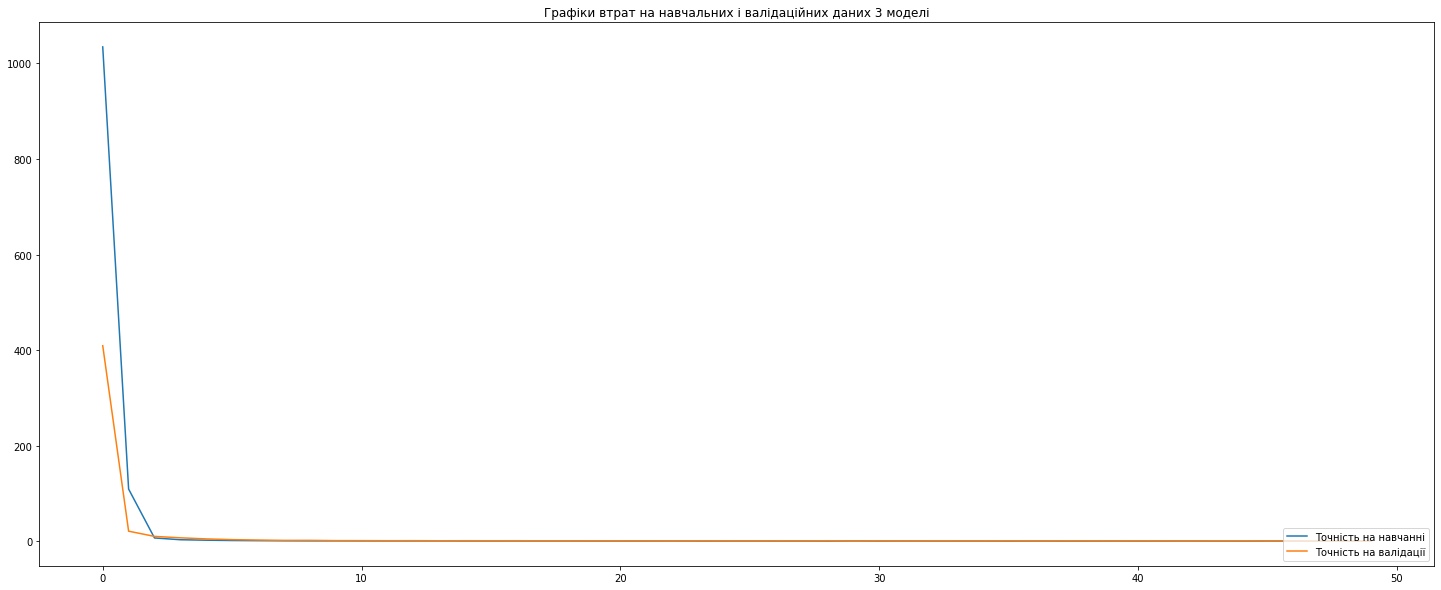

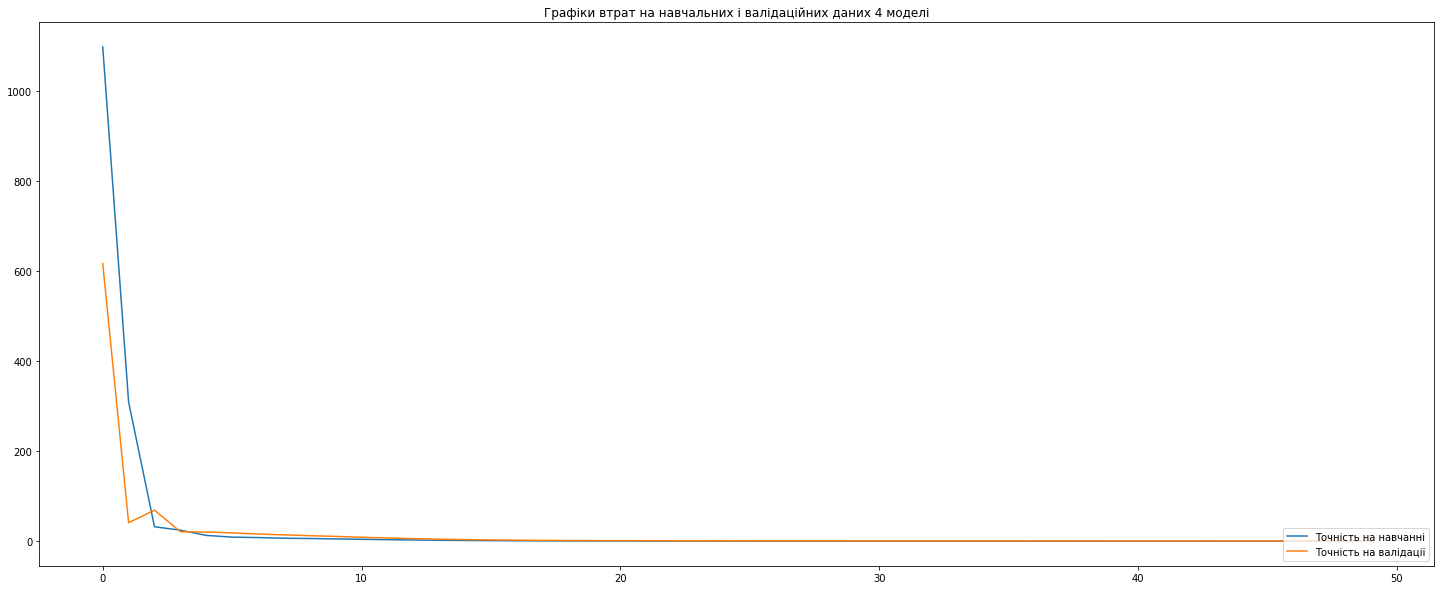

In [ ]:
counter = 0
for i in range(0,4):
  counter += 1
  loss = histories[i].history['loss']
  val_loss = histories[i].history['val_loss']
  
  epochs_range = range(EPOCHS)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Точність на навчанні')
  plt.plot(epochs_range, val_loss, label='Точність на валідації')
  plt.legend(loc='lower right')
  plt.title(f'Графіки втрат на навчальних і валідаційних даних {counter} моделі')

In [ ]:
for i in range(4):
  print(f'Model {i+1} loss: {models[i].evaluate(test_X, test_y)}')

2/2 [==============================] - 0s 13ms/step - loss: 0.4008
Model 1 loss: 0.40079256892204285
2/2 [==============================] - 0s 7ms/step - loss: 0.4212
Model 2 loss: 0.42120420932769775
2/2 [==============================] - 0s 7ms/step - loss: 0.3603
Model 3 loss: 0.36030521988868713
2/2 [==============================] - 0s 8ms/step - loss: 0.5692
Model 4 loss: 0.5692059993743896


Зі значень втра можемо зробити висновок, що RMSprop спрацював найгірше. Варіації adam спрацювали значно краще, а фафоритом по якості та швидкості став nadam. 


Тепер порівняємо як на модель впливають різні функції активації

In [ ]:
neurons = 128
activ = ['relu', 'linear', 'selu', 'softplus']

for i in range(4):
  models[i] = Sequential([
                      Dense(neurons, activation=activ[i], input_shape=(train_X.shape[1],)),
                      Dense(neurons, activation=activ[i]),
                      Dense(neurons, activation=activ[i]),
                      Dense(1)
  ])

  models[i].compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
for i in range(4):
    histories[i] = models[i].fit(train_X, train_y, validation_data=validation_data,
                      epochs=EPOCHS)

Epoch 1/50
12/12 [==============================] - 1s 15ms/step - loss: 886.2065 - val_loss: 224.7050
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 75.5475 - val_loss: 102.4221
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 26.7291 - val_loss: 22.6790
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 14.0115 - val_loss: 7.9771
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 5.6359 - val_loss: 6.5508
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 2.9491 - val_loss: 5.6466
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 2.2333 - val_loss: 4.6949
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 1.6713 - val_loss: 3.5301
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 1.3182 - val_loss: 2.7484
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 1.1172 - val_loss: 2.1477
Epoch 11

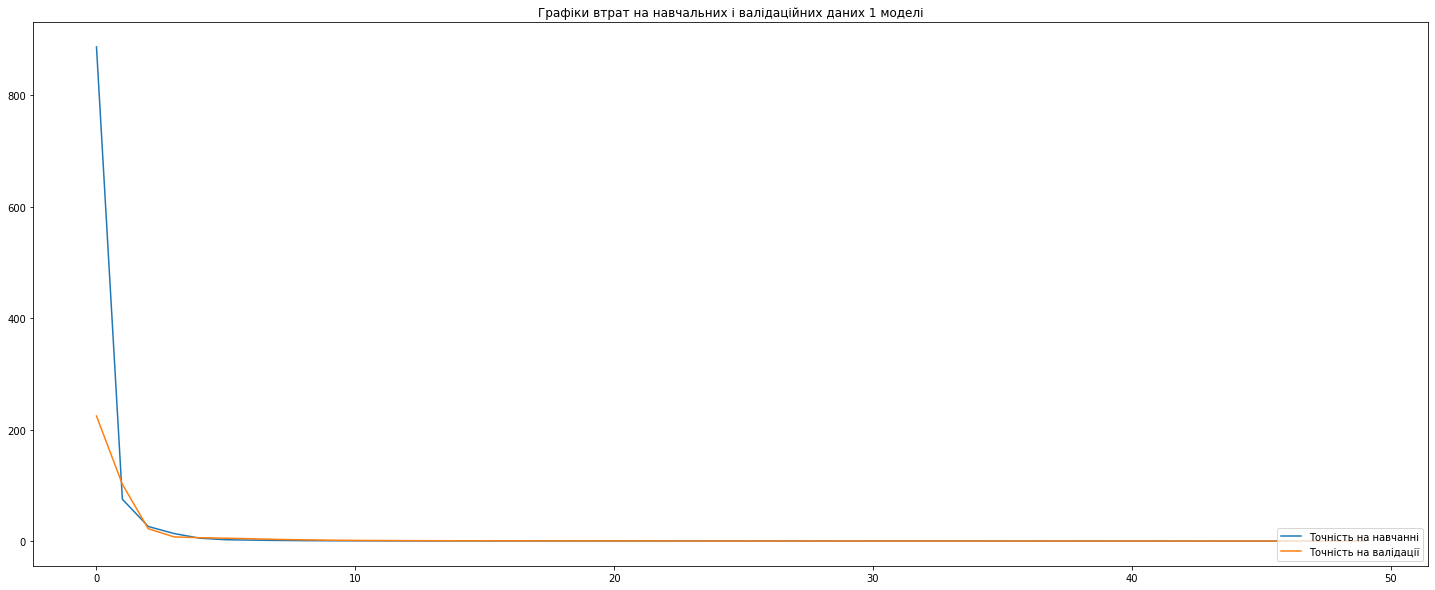

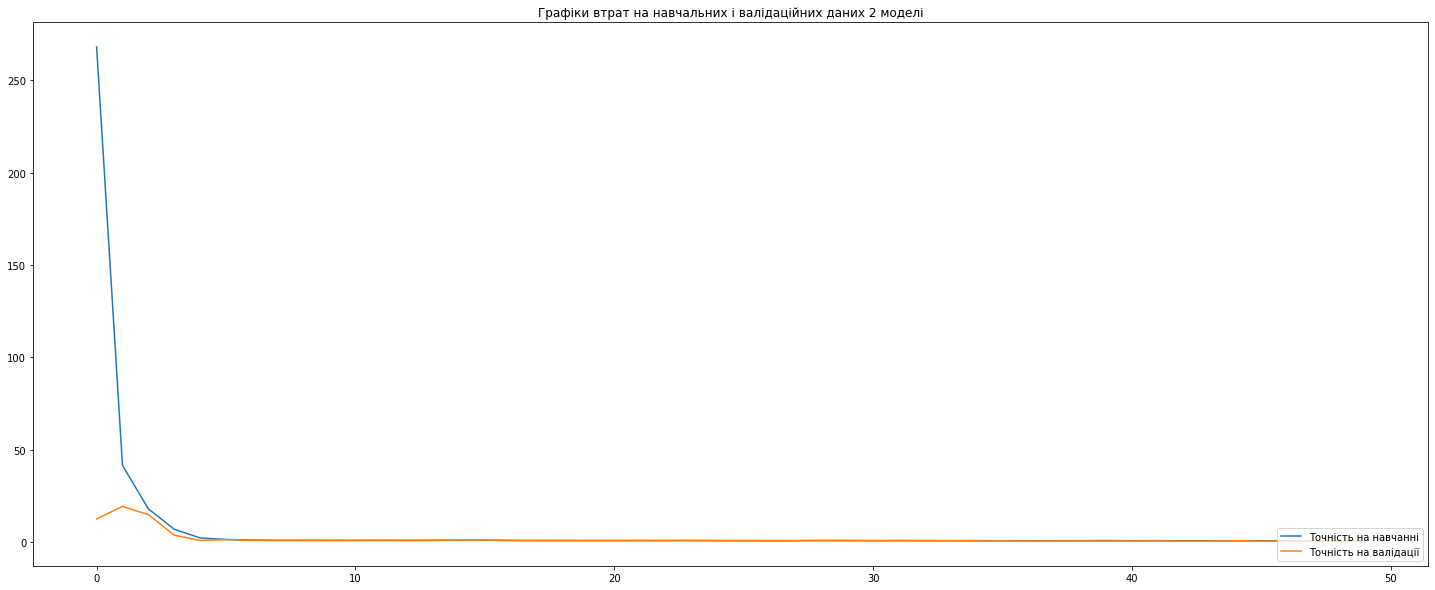

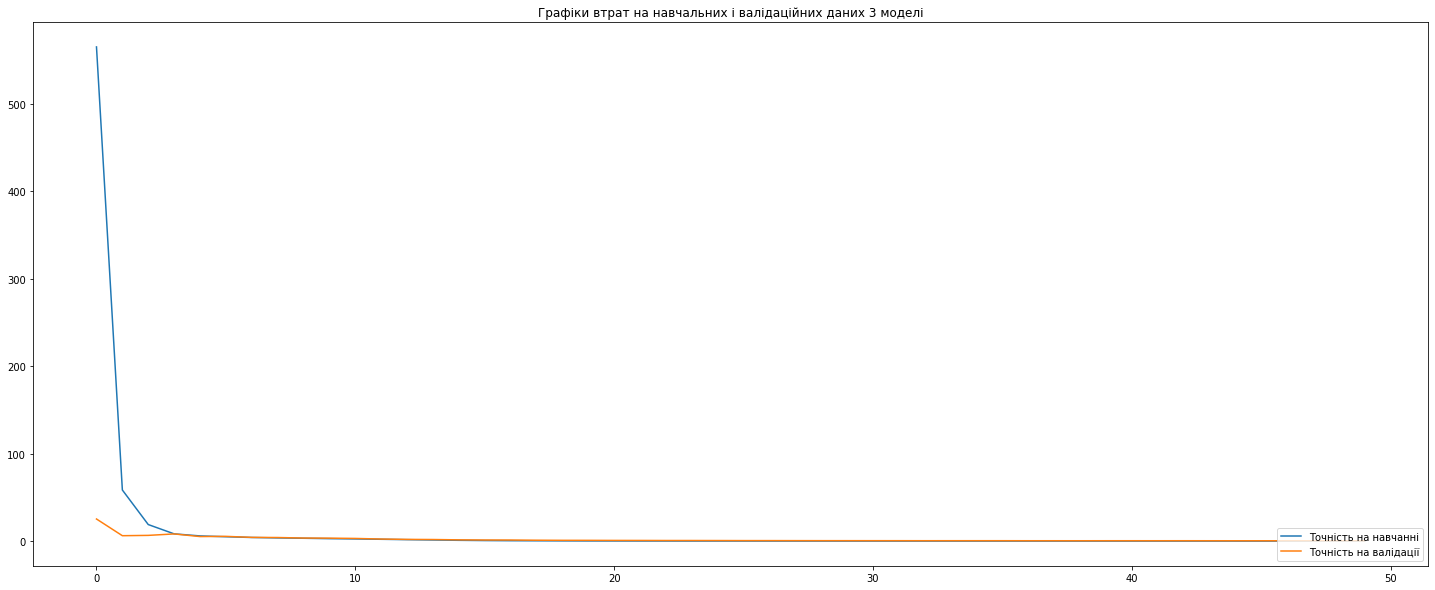

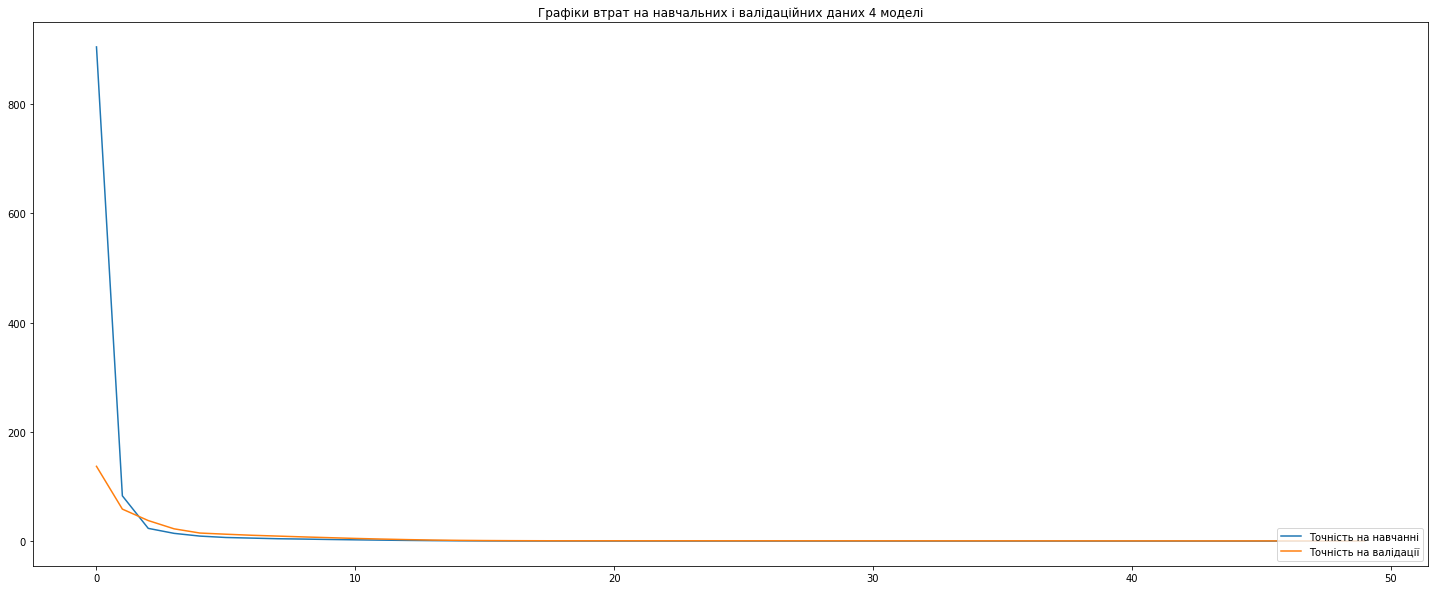

In [ ]:
counter = 0
for i in range(0,4):
  counter += 1
  loss = histories[i].history['loss']
  val_loss = histories[i].history['val_loss']
  
  epochs_range = range(EPOCHS)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Точність на навчанні')
  plt.plot(epochs_range, val_loss, label='Точність на валідації')
  plt.legend(loc='lower right')
  plt.title(f'Графіки втрат на навчальних і валідаційних даних {counter} моделі')

Як видно з графіків, функції активаціх не суттєво вплинули на нашу модель. З цього можна зробити висновок, що їх слід використовувати, для більш точного налаштування моделі. 
Проте, ми не врахували, що наша модель досить проста. Можливо при використанні цих функцій на більш складних моделях результати будуть значно відрізнятися.

Також при аналізу всіх вищенаведених графіків можна побачити, що значення val-loss майже не піднімалося. З цього можна зробити висновок, що моделі побудовані правильно не є перенавченими.